In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from visualize import plot_wordcloud, plot_word_counts

In [2]:
# TODO - move functions to module, complete docstrings
# extract_transform.py
def get_word_counts(documents, max_words=10):
    # can add ngram_range parameter to get bigrams - max_ngram
    vectorizer = CountVectorizer(lowercase=False, max_features=max_words)
    
    # number of documents (row) by number of words (column)
    X = vectorizer.fit_transform(documents)
    words = vectorizer.get_feature_names()
    document_term_df = pd.DataFrame(X.toarray(), columns=words)
    word_counts = document_term_df.sum(axis=0).reset_index()
    word_counts.rename(columns={'index': 'word', 0: 'count'}, inplace=True)
    return word_counts   

def sort_word_counts(word_counts):
    # sort descending by word count
    sorted_word_counts = word_counts.sort_values(
        by=['count'],
        ascending=False
    )
    sorted_word_counts.reset_index(drop=True, inplace=True)
    return sorted_word_counts

In [3]:
osm_data = pd.read_json('data/preprocessed_osm_data.json.gz')
wikidata = pd.read_json('data/preprocessed_wikidata.json')

In [4]:
wikidata.head(5)

,qid,preprocessed_names,preprocessed_description
0,Q37158,starbucks starbucks corporation starbucks coff...,american multinational coffee company
1,Q154950,royal dutch shell rds shell royal dutch shell plc,anglo dutch oil company
2,Q1208279,petro canada,company
3,Q867662,esso exxcon,oil gas company
4,Q175106,tim hortons tim hortons inc,multinational quick service restaurant chain


In [5]:
# TODO - discuss chain restaurants / franchises with descriptions that do not contain the words
# 'chain' or 'restaurant', how 'corporation' in names may not be good indicator

In [6]:
names = wikidata['preprocessed_names']
descriptions = wikidata['preprocessed_description']

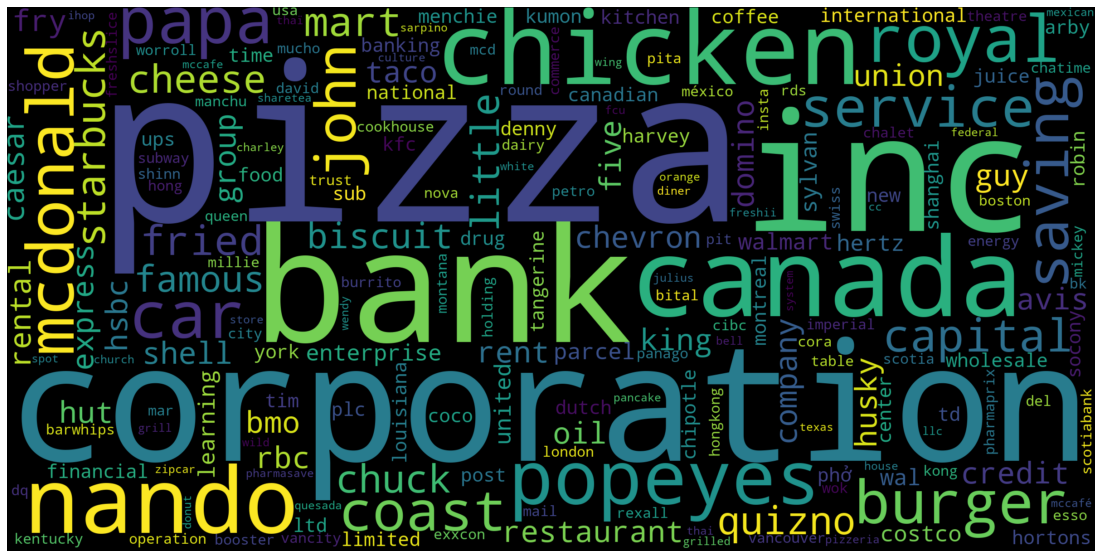

In [7]:
name_text = ' '.join(names)
plot_wordcloud(name_text)

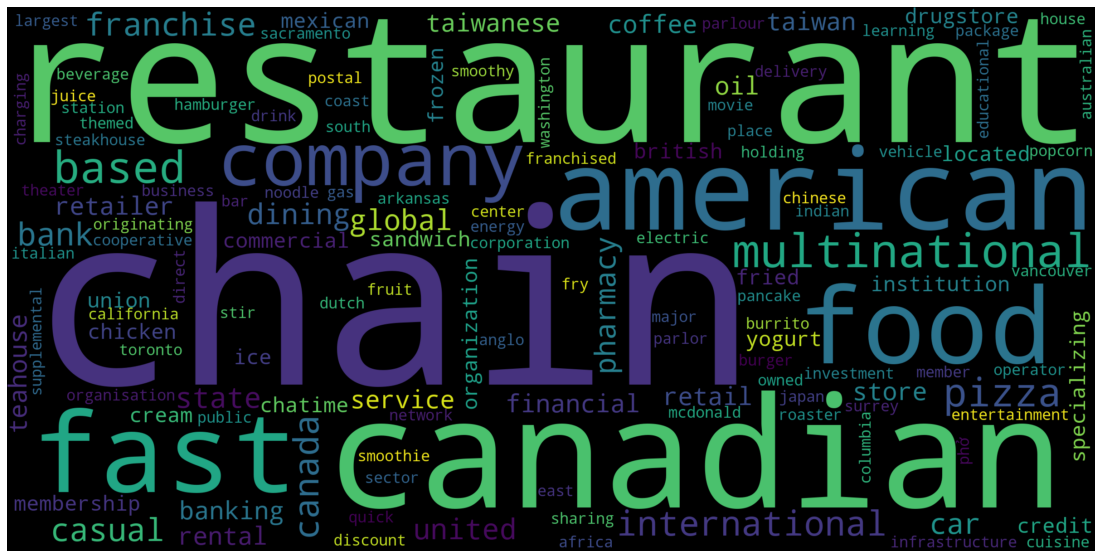

In [8]:
description_text = ' '.join(descriptions)
plot_wordcloud(description_text)

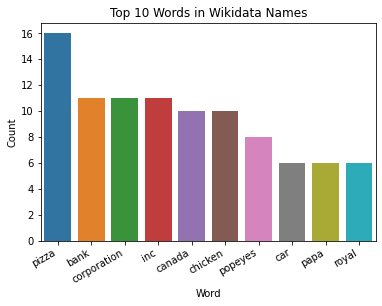

In [9]:
name_word_counts = get_word_counts(names)
name_word_counts = sort_word_counts(name_word_counts)
plot_word_counts(name_word_counts, 'Names')

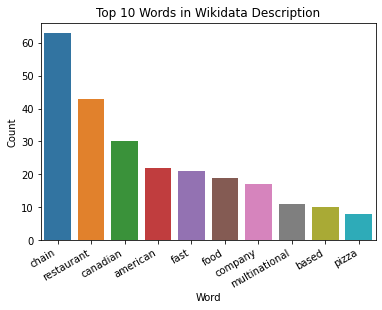

In [10]:
description_word_counts = get_word_counts(descriptions)
description_word_counts = sort_word_counts(description_word_counts)
plot_word_counts(description_word_counts, 'Description')